Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## Assignment 3 - Finite Differences
This assignment sheet will guide you through the process of setting up a Finite Difference Method (FDM) for the Poisson equation on a square domain 
$$-\Delta u = f \text{ in }\Omega=[a,b]^2$$
with homogenous Dirichlet boundary conditions
$$ u = 0 \text{ on } \delta \Omega$$ .

### 3.1 - Grid generation
In this part we will write a function ```generateGrid``` which generates an equistant grid for the domain $\Omega = [a,b]^2$ with $N$ grid-points in each direction.<br>
<b>INPUT:</b> $a,b$ - domain boundaries, $N$ - number of grid-points per direction<br>
<b>OUTPUT:</b> $grid$ - an array of dimension $N^2 \times 2$ with coordinates of all points.

In [2]:
import numpy as np

# YOUR CODE HERE
def generateGrid(a, b, N):
    '''
    generateGrid generates an equidistant grid for the domain  Ω=[𝑎,𝑏]^2  with  𝑁  grid-points in each direction.
    𝑎,𝑏  - domain boundaries,  
    𝑁  - number of grid-points per direction
    '''
    x = np.linspace(a, b, N) # One dimension of the equidistant grid
    y = np.linspace(a, b, N)
    grid_x, grid_y = np.meshgrid(x, y, indexing='xy')  # "D grid with matrix-representation NxN"
    return np.array([grid_x, grid_y])

grid1 = generateGrid(0, 3, 4)
grid1

array([[[0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.]],

       [[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]]])

### 3.2 - Assembly of the linear system
Here we will assemble the linear system corresponding with a Finite Difference scheme with respect to a certain grid. For a grid with $N\times N$ points our system has the size $N^2$ - remember why? - and the matrix entries are given by 
$$a_{ij} = \begin{cases}
				\text{if }P_i\in\delta\Omega & \begin{cases}
				1 & \text{if }j=i\\
				0 &\text{otherwise}
				\end{cases}\\
				\text{if }P_i\not\in\delta\Omega & \begin{cases}
				\dfrac{4}{h^2} & \text{ if }j=i\\
				\dfrac{-1}{h^2} & \text{ if } j\in\lbrace i-1,i+1,i-N,i+N\rbrace\\
				0 & \text{ otherwise}
				\end{cases}
				\end{cases}$$
while the right-hand side is given by
$$ l_i = \begin{cases}
0 & \text{ if }P_i \in \delta \Omega \\
f(P_i) & \text{ otherwise }
\end{cases}$$
with function values $f(P_i)$ at certain grid points.<br><br>
Write a function ```assembleSystem```. <br>
<b>INPUT:</b> $grid$ - an array of dimension $N^2 \times 2$ with coordinates of all points, $f:\mathbb{R}^2\rightarrow \mathbb{R}$ - a <i>lambda-function</i>  <br>
<b>OUTPUT:</b> $A$ - an array of dimension $N^2 \times N^2$, $l$ - an array of dimension $N^2$ <br><br>
Hint: Passing this exercise does not depend on the previous exercise to be fulfilled. If needed, create a grid manually to test your function!

In [3]:
import numpy as np

f1 = lambda x,y: x**2 + y**2
grid1 = generateGrid(0, 3, 4)

# YOUR CODE HERE
def assembleSystem(grid, f):
    # Initiation of arrays and values
    x = grid[0]
    y = grid[1]
    h = x[0,1]-x[0,0]
    n = np.size(x)
    N = np.size(x[1])
    A = np.zeros((n, n))
    l = np.zeros(n)
    
    for i in range(0, n):   # A loop for i,j from 0 to n
        for j in range(0, n):
            # Boundary contidions (bottom, top, left, right)
            if 0<=i<=N-1 or N*(N-1)<=i<=N**2-1 or np.mod(i,N)==0 or 1+np.mod(i,N)== N :
                if i==j:
                    A[i,j] = 1
            # Non-boundary elements
            else:
                l[i] = f(x, y).flatten()[i]
                if i==j:
                    A[i,j] = 4/h**2
                if j==i-1 or j==i+1 or j==i-N or j==i+N:
                    A[i,j] = -1/h**2
    return A, l
    
    
print("A=")
print(assembleSystem(grid1, f1)[0] )
print()
print("l=", assembleSystem(grid1, f1)[1] )

A=
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

### 3.3 - vectorized Matrix assembler (Optional) 
Write the Matrix assembler ```assembleSystem``` from above again but vectorized by numpy functions. 

In [4]:
import numpy as np

# YOUR CODE HERE
def assembleSystem(grid, f):
    # Initiation of arrays and values
    x = grid[0]
    y = grid[1]
    h = x[0,1]-x[0,0]
    n = np.size(x)
    N = np.size(x[1])
    A = np.zeros((n, n))
    l = np.zeros(n)

    np.fill_diagonal(A, 1) # Diagonal elements
    for index in np.ndindex(np.shape(A)): # loop
        i, j = index
        if 0<=i<=N-1 or N*(N-1)<=i<=N**2-1 or np.mod(i,N)==0 or 1+np.mod(i,N)== N: pass # Boundary contidions (bottom, top, left, right)
       
        else: # Non-boundary elements
            l[i] = f(x, y).flatten()[i]
            if i==j:
                A[i,j] = 4/h**2
            if j==i-1 or j==i+1 or j==i-N or j==i+N:
                A[i,j] = -1/h**2
        
    return A, l
    
    
print("A=")
print(assembleSystem(grid1, f1)[0] )
print()
print("l=", assembleSystem(grid1, f1)[1] )

A=
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

### 3.4 - Solving the problem
Solve the following poisson problem by using the functions defined above and visualize the solution. <br>

$$-\Delta u = 1 \text{ in }\Omega=[-1,1]^2$$
$$ u = 0 \text{ on } \delta \Omega$$

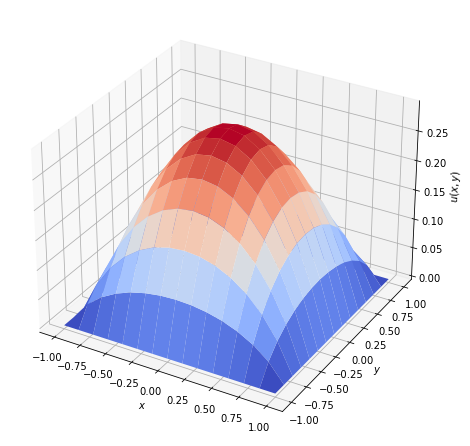

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# YOUR CODE HERE

# Solver
f_final = lambda x,y: np.ones((np.size(x[0]), np.size(y[0]))) #defindined 2D force vector
grid_final = generateGrid(-1, 1, 15) # defined grid
u = np.linalg.solve(assembleSystem(grid_final, f_final)[0], assembleSystem(grid_final, f_final)[1]) # Solves for u: A*u=l

# Result #Uncomment to show results of array u
# print("u=", u) 

# Visualization
plt.rcParams["figure.figsize"] = [6, 6] # Seting size
fig = plt.figure() # creating figure
ax = Axes3D(fig)
X = grid_final[0]
Y = grid_final[1]
Z =  np.reshape(u, (np.size(grid_final[0][0]), np.size(grid_final[0][0])))
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$u(x,y)$')
plt.show()